In [376]:
# importing some libs so that we can work with data easily :)
# all of the compution is done on colab
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [377]:
# reading the csv file by using pandas :)
df = pd.read_csv('ahmedabad.csv' , encoding='utf-8')

In [378]:
df.index

RangeIndex(start=0, stop=6853, step=1)

In [379]:
print("missing values in data-set in '%'")
print("")
print(f"{(df.isnull().mean())*100}")

missing values in data-set in '%'

Unnamed: 0      0.000000
Title           0.000000
type_area       0.000000
value_area      0.000000
status          0.000000
floor           0.116737
transaction     0.306435
furnishing      0.539910
facing          1.298701
price           0.000000
price_sqft      6.537283
description    25.769736
dtype: float64


# all the data cleaning and feature engineering

In [380]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6853 entries, 0 to 6852
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   6853 non-null   int64 
 1   Title        6853 non-null   object
 2   type_area    6853 non-null   object
 3   value_area   6853 non-null   object
 4   status       6853 non-null   object
 5   floor        6845 non-null   object
 6   transaction  6832 non-null   object
 7   furnishing   6816 non-null   object
 8   facing       6764 non-null   object
 9   price        6853 non-null   object
 10  price_sqft   6405 non-null   object
 11  description  5087 non-null   object
dtypes: int64(1), object(11)
memory usage: 642.6+ KB


In [381]:
df.isnull().sum()

,0
Unnamed: 0,0
Title,0
type_area,0
value_area,0
status,0
floor,8
transaction,21
furnishing,37
facing,89
price,0


In [382]:
df.duplicated().sum()
df = df.drop_duplicates()

In [383]:
df['price_sqft'].isnull().sum()

np.int64(448)

In [384]:
# DROP the description
df = df.drop(['description', 'Unnamed: 0'], axis=1)

In [385]:
# quick look into the data-set :)
df.head(5)

,Title,type_area,value_area,status,floor,transaction,furnishing,facing,price,price_sqft
0,"2 BHK Apartment for Sale in Vivaan Aura, Zunda...",Super Area,155 sqyrd,Poss. by Dec '26,New Property,Unfurnished,Vivaan Aura,2,â‚¹48.1 Lac,"â‚¹3,444 per sqft"
1,"2 BHK Apartment for Sale in SP Epitome, Shela ...",Carpet Area,710 sqft,Poss. by Jun '27,New Property,Unfurnished,SP Epitome,2,â‚¹50 Lac,"â‚¹3,876 per sqft"
2,"2 BHK Apartment for Sale in Pacifica Amara, Sa...",Carpet Area,588 sqft,Poss. by Dec '25,New Property,Unfurnished,Pacifica Amara,2,â‚¹40 Lac,"â‚¹3,738 per sqft"
3,"2 BHK Apartment for Sale in Kavisha AER, Shela...",Carpet Area,687 sqft,Poss. by Jun '26,New Property,Unfurnished,Kavisha AER,2,â‚¹48.8 Lac,"â‚¹3,900 per sqft"
4,"2 BHK Apartment for Sale in Aarambh Vistara, G...",Carpet Area,621 sqft,Poss. by Mar '25,New Property,Unfurnished,Aarambh Vistara,2,â‚¹48 Lac,"â‚¹4,248 per sqft"


In [386]:
import re
def clean_price(val):
    if pd.isna(val):
        return np.nan
    val = str(val).strip()

    return re.sub(r'^[^0-9A-Za-z]+','',val)


def price_conversion(val):
    if 'Lac' in val:
        return float(val.replace('Lac', "").strip()) *1e5
    elif "Cr" in val:
        return float(val.replace('Cr', "").strip()) *1e7
    elif "Call for Price" in val:
        return str(val.strip())
    else:
        return float(val.strip())



df['price'] = df['price'].apply(clean_price)
df['price'] = df['price'].apply(price_conversion)

In [387]:
df['type_area'].unique()

array(['Super Area', 'Carpet Area', 'Transaction', 'Status', 'Built Area',
       'Under Construction'], dtype=object)

In [388]:
df['type_area'] = df['type_area'].replace({
    "Super Area": 'super area',
    'Carpet Area': 'carpet area',
    'Transaction': np.nan,
    'Status': np.nan,
    'Under Construction': 'under construction'
} )

df['type_area'].unique()

array(['super area', 'carpet area', nan, 'Built Area',
       'under construction'], dtype=object)

In [389]:
df['status'].unique()

array(["Poss. by Dec '26", "Poss. by Jun '27", "Poss. by Dec '25",
       "Poss. by Jun '26", "Poss. by Mar '25", "Poss. by Jul '24",
       "Poss. by Jul '26", "Poss. by Dec '24", 'Ready to Move',
       "Poss. by May '26", "Poss. by Nov '24", "Poss. by Oct '25",
       "Poss. by Jan '26", "Poss. by Aug '24", "Poss. by Oct '24",
       "Poss. by Feb '28", "Poss. by Sep '25", "Poss. by Mar '26",
       "Poss. by Jan '25", "Poss. by Nov '25", "Poss. by Dec '27",
       "Poss. by Sep '24", '4 out of 5', '1 out of 1', '3 out of 3',
       '3 out of 5', '3 out of 4', "Poss. by Jun '25", '4 out of 10',
       '4 out of 4', 'Bapunagar One', '2 out of 3', '3 out of 9',
       '7 out of 8', "Poss. by Jun '24", '5 out of 5', '1 out of 4',
       '1 out of 14', '13 out of 13', '2 out of 5', '9 out of 14',
       '8 out of 14', "Poss. by Mar '27", "Poss. by Jul '25",
       "Poss. by May '24", "Poss. by Aug '25", "Poss. by Feb '25",
       "Poss. by Apr '25", "Poss. by Dec '28", "Poss. by Apr '26

In [390]:
def status_clean(val):
    val = str(val)

    if "Poss." in val or "Ready to Move" in val or "Under Construction" in val:
        return ("possession", val)
    if val in ["New Property", "Resale"]:
        return ('transaction', val)
    if "out of" in val:
        return ("floor", val)

    if "Const. Age" in val:
        return ("age" , val)

    return ('project', val)

df[['status_type', 'status_value']] = df['status'].apply(status_clean).apply(pd.Series)
df.drop(['status'], axis=1 , inplace=True)

In [391]:
df['status_value'][11]

'Ready to Move'

In [392]:
df['status_type'][11]

'possession'

In [393]:

# df.sample()
df['facing'].unique()

array(['2', '1 Covered', 'East', 'Garden/Park', 'North - East', 'North',
       'Main Road', 'North - West', 'West', '1',
       'Garden/Park, Pool, Main Road', 'Garden/Park, Main Road',
       'Vandematram City', '1 Covered,', 'Garden Paradise',
       'Parshwanath Atlantis Park', 'Shukun Heights', 'South - East',
       'Radheshyam Residency', 'Shrifal Apartment', 'Omro Anmol Avenue',
       'Main Road, Garden/Park, Pool', 'Silver Pearl', 'South -West',
       'Savvy Studioz', 'Sainath Avenue', 'Shreeji Tulsi Heights',
       'Soham Sanidhya', 'Dev Darshan Apartment', 'Ashraya 10',
       'Freehold', 'Sarvopari Elegance',
       'Jigish Rohitbhai Patel Jahnvi Residency Phase 2',
       'Saanvi Aarambh', '3', 'Suryam Elegance', 'Shyam Tirth',
       'Karnavati 3', 'Nijanand Pushkar Elegance', 'Shakti Gardenia',
       'Siddharth Icon', 'Sun Real Homes', 'Shilp Solace',
       'VandeMatram Prime', 'Laxmi Nivas', 'Rashmi Vihar', 'Shilp Ananta',
       'Green City', 'Sun Rising Homes', n

In [394]:
# it is to check the no of rows and columns in the data-set :)
x = df.shape
print('This data-set has', x[0] , "rows" , 'and' ,x[-1] , "columns")

This data-set has 6853 rows and 11 columns


In [395]:
# we can also need to check data type so there are some couple of ways for it w'll use .dtype method for now
print('data type of the data present in the columns are give below')
print('')
print(df.dtypes)

data type of the data present in the columns are give below

Title           object
type_area       object
value_area      object
floor           object
transaction     object
furnishing      object
facing          object
price           object
price_sqft      object
status_type     object
status_value    object
dtype: object


In [396]:
# null values per column
df.isnull().sum()

,0
Title,0
type_area,4
value_area,0
floor,8
transaction,21
furnishing,37
facing,89
price,0
price_sqft,448
status_type,0


In [397]:
df.duplicated().sum()

np.int64(185)

In [398]:
df = df.drop_duplicates()

In [399]:
df['type_area'].unique()

array(['super area', 'carpet area', nan, 'Built Area',
       'under construction'], dtype=object)

In [400]:
# missing values :)
print("missing values in data-set in '%'")
print("")
print(f"{(df.isnull().mean())*100}")

missing values in data-set in '%'

Title           0.000000
type_area       0.044991
value_area      0.000000
floor           0.104979
transaction     0.284943
furnishing      0.509898
facing          1.289742
price           0.000000
price_sqft      6.388722
status_type     0.000000
status_value    0.000000
dtype: float64


In [401]:
df.head()

,Title,type_area,value_area,floor,transaction,furnishing,facing,price,price_sqft,status_type,status_value
0,"2 BHK Apartment for Sale in Vivaan Aura, Zunda...",super area,155 sqyrd,New Property,Unfurnished,Vivaan Aura,2,4810000.0,"â‚¹3,444 per sqft",possession,Poss. by Dec '26
1,"2 BHK Apartment for Sale in SP Epitome, Shela ...",carpet area,710 sqft,New Property,Unfurnished,SP Epitome,2,5000000.0,"â‚¹3,876 per sqft",possession,Poss. by Jun '27
2,"2 BHK Apartment for Sale in Pacifica Amara, Sa...",carpet area,588 sqft,New Property,Unfurnished,Pacifica Amara,2,4000000.0,"â‚¹3,738 per sqft",possession,Poss. by Dec '25
3,"2 BHK Apartment for Sale in Kavisha AER, Shela...",carpet area,687 sqft,New Property,Unfurnished,Kavisha AER,2,4880000.0,"â‚¹3,900 per sqft",possession,Poss. by Jun '26
4,"2 BHK Apartment for Sale in Aarambh Vistara, G...",carpet area,621 sqft,New Property,Unfurnished,Aarambh Vistara,2,4800000.0,"â‚¹4,248 per sqft",possession,Poss. by Mar '25


In [402]:
# not so important but still if you want you can try storing name of fetaures in variable for record :)

columns = list(df.columns)
columns

['Title',
 'type_area',
 'value_area',
 'floor',
 'transaction',
 'furnishing',
 'facing',
 'price',
 'price_sqft',
 'status_type',
 'status_value']

In [403]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6668 entries, 0 to 6852
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         6668 non-null   object
 1   type_area     6665 non-null   object
 2   value_area    6668 non-null   object
 3   floor         6661 non-null   object
 4   transaction   6649 non-null   object
 5   furnishing    6634 non-null   object
 6   facing        6582 non-null   object
 7   price         6668 non-null   object
 8   price_sqft    6242 non-null   object
 9   status_type   6668 non-null   object
 10  status_value  6668 non-null   object
dtypes: object(11)
memory usage: 625.1+ KB


In [404]:
df.sample()

,Title,type_area,value_area,floor,transaction,furnishing,facing,price,price_sqft,status_type,status_value
5503,"4 BHK Apartment for Sale in Shivalik Edge, Amb...",carpet area,2358 sqft,1 out of 14,New Property,Unfurnished,East,29500000.0,"â‚¹6,900 per sqft",possession,Ready to Move


In [405]:
df["transaction"].unique()

array(['Unfurnished', 'New Property', 'Resale', 'Semi-Furnished',
       'Furnished', 'Shakti Gardenia', 'Other', nan,
       'Gajanan Dev Home Town 4', 'Karnavati Apartment II',
       'Sangani Platinum', 'Saujanya II', 'Harsh Apartment',
       'Bhagwat Elysium', 'Swati Greens', 'Shivalik Sharda Park View 2',
       'Freehold', 'Harshdip Avadh Elegance', 'Bakeri City', '3',
       'Veer Savarker Heights 2 Vasantnagar', 'Galaxy Gala Laxuria',
       'Garden/Park', 'Orchid Heaven', '14 Covered',
       'Shree Balaji Wind Park', 'Samyak 49', '24 Karat', 'The Indus',
       'Super Shaligram', 'Times 40'], dtype=object)

In [406]:
df = df.drop(['price_sqft'], axis=1)

In [407]:
df['Title'][9]

'2 BHK Apartment for Sale in Sun Parkwest, Shela Ahmedabad'

In [408]:
df.sample(5)

,Title,type_area,value_area,floor,transaction,furnishing,facing,price,status_type,status_value
2725,3 BHK Apartment for Sale in Shilaj Ahmedabad,super area,1800 sqft,4 out of 6,Resale,Unfurnished,3,9000000.0,possession,Ready to Move
4462,"4 BHK Apartment for Sale in Shilp Residency, G...",carpet area,2785 sqft,Ground out of 13,New Property,Unfurnished,North - East,20600000.0,possession,Poss. by Jun '27
1353,2 BHK Apartment for Sale in Nava Naroda Road A...,carpet area,350 sqft,Resale,Semi-Furnished,East,"Garden/Park, Pool, Main Road",3000000.0,possession,Ready to Move
3765,"3 BHK Apartment for Sale in Maninagar East, Ma...",carpet area,1220 sqft,4 out of 5,New Property,Furnished,Main Road,11000000.0,possession,Ready to Move
1015,1 BHK Apartment for Sale in Nava Naroda Ahmedabad,super area,500 sqft,5 out of 8,Resale,Semi-Furnished,1,2300000.0,possession,Ready to Move


In [409]:
# clean columns
# 1 type area ----------------- looks good
# 2 value area ------------ just convert sqft and sqm , sqyrd to one singel type
# 3 floor ----------------- convert to 1/7 or something like it form
# 4 transcations -------------- looks useless so may be drop it
# 5 furnishing -------------------- search google or chatgpt as i cant under stand data
# 6 facing ----------------------- make it direction only  or for good drop it as it is not releivent data
# 7 Flat type(new column from title)----------- like 1 BHK , 2 BHK or other
# 8 loaction or building name ---------- from title (after in and before ,)

# so there will be about 7-8 meaningful columns after this

In [410]:
def flat_type(text):
    match = re.search(r'(\d+)', text , re.IGNORECASE)
    if match:
        return match.group(0)
    return None


df['BHK'] = df['Title'].apply(flat_type)

In [411]:
def location(text):
    match = re.search(r'\bin\b\s+(.*)', text , re.IGNORECASE)
    if match:
        return match.group(1)
    return None

df['location'] = df['Title'].apply(location)

In [412]:
df.sample(10)

,Title,type_area,value_area,floor,transaction,furnishing,facing,price,status_type,status_value,BHK,location
2118,"3 BHK Apartment for Sale in Aashray Aurum, Amb...",super area,1750 sqft,Resale,Unfurnished,Aashray Aurum,3,8800000.0,floor,1 out of 3,3,"Aashray Aurum, Ambli Ahmedabad"
3673,3 BHK Apartment for Sale in Parishram Satva Hi...,super area,230 sqyrd,3 out of 13,Resale,Furnished,East,16000000.0,possession,Ready to Move,3,"Parishram Satva Hi Life, Sola Ahmedabad"
6132,"4 BHK Apartment for Sale in The Emberlynn, Amb...",carpet area,3239 sqft,15 out of 22,New Property,Unfurnished,East,58900000.0,possession,Poss. by Dec '26,4,"The Emberlynn, Ambli Bopal Road Ahmedabad"
1434,1 BHK Builder Floor for Sale in Vatva Ahmedabad,super area,850 sqft,Ground out of 6,Resale,Semi-Furnished,1,3900000.0,possession,Ready to Move,1,Vatva Ahmedabad
4834,"5 BHK Apartment for Sale in Riviera Majestica,...",super area,5040 sqft,New Property,Unfurnished,"Garden/Park, Pool, Main Road",Riviera Majestica,27500000.0,floor,9 out of 17,5,"Riviera Majestica, Shela Ahmedabad"
2548,2 BHK Apartment for Sale in Shree Ami Vaibhav ...,super area,1100 sqft,3 out of 4,Resale,Furnished,Shree Ami Vaibhav II Apartments,7900000.0,possession,Ready to Move,2,"Shree Ami Vaibhav II Apartments, Shahibag Ahme..."
5114,"4 BHK Apartment for Sale in North View, Univer...",carpet area,2400 sqft,5 out of 7,Resale,Unfurnished,East,33000000.0,possession,Ready to Move,4,"North View, University Road Ahmedabad"
3585,3 BHK Apartment for Sale in Keshav Nagar Ahmed...,super area,1500 sqft,Resale,Furnished,3,NaN,9500000.0,floor,2 out of 4,3,Keshav Nagar Ahmedabad
1026,2 BHK Apartment for Sale in Chandlodiya Ahmedabad,carpet area,115 sqyrd,4 out of 5,Resale,Semi-Furnished,4,3200000.0,possession,Ready to Move,2,Chandlodiya Ahmedabad
3541,"2 BHK Apartment for Sale in Indraprasth 3, Sat...",carpet area,140 sqyrd,3 out of 5,Resale,Semi-Furnished,Indraprasth 3,13500000.0,possession,Ready to Move,2,"Indraprasth 3, Satellite Ahmedabad"


In [413]:
df.isnull().sum()

,0
Title,0
type_area,3
value_area,0
floor,7
transaction,19
furnishing,34
facing,86
price,0
status_type,0
status_value,0


In [414]:
df.head(10)

,Title,type_area,value_area,floor,transaction,furnishing,facing,price,status_type,status_value,BHK,location
0,"2 BHK Apartment for Sale in Vivaan Aura, Zunda...",super area,155 sqyrd,New Property,Unfurnished,Vivaan Aura,2,4810000.0,possession,Poss. by Dec '26,2,"Vivaan Aura, Zundal Ahmedabad"
1,"2 BHK Apartment for Sale in SP Epitome, Shela ...",carpet area,710 sqft,New Property,Unfurnished,SP Epitome,2,5000000.0,possession,Poss. by Jun '27,2,"SP Epitome, Shela Ahmedabad"
2,"2 BHK Apartment for Sale in Pacifica Amara, Sa...",carpet area,588 sqft,New Property,Unfurnished,Pacifica Amara,2,4000000.0,possession,Poss. by Dec '25,2,"Pacifica Amara, Sanand Ahmedabad"
3,"2 BHK Apartment for Sale in Kavisha AER, Shela...",carpet area,687 sqft,New Property,Unfurnished,Kavisha AER,2,4880000.0,possession,Poss. by Jun '26,2,"Kavisha AER, Shela Ahmedabad"
4,"2 BHK Apartment for Sale in Aarambh Vistara, G...",carpet area,621 sqft,New Property,Unfurnished,Aarambh Vistara,2,4800000.0,possession,Poss. by Mar '25,2,"Aarambh Vistara, Gota Ahmedabad"
5,"2 BHK Apartment for Sale in Vivaan Essence, Zu...",super area,1413 sqft,New Property,Unfurnished,Vivaan Essence,1 Covered,4990000.0,possession,Poss. by Jun '26,2,"Vivaan Essence, Zundal Ahmedabad"
6,"2 BHK Apartment for Sale in Kavisha AER, Shela...",carpet area,700 sqft,7 out of 14,New Property,Unfurnished,East,4910000.0,possession,Poss. by Dec '25,2,"Kavisha AER, Shela Ahmedabad"
7,"2 BHK Apartment for Sale in Vivaan Aura, Zunda...",carpet area,85 sqyrd,11 out of 14,New Property,Unfurnished,East,4840000.0,possession,Poss. by Jun '26,2,"Vivaan Aura, Zundal Ahmedabad"
8,"2 BHK Apartment for Sale in Kavisha Atria, She...",carpet area,655 sqft,New Property,Unfurnished,North - East,Garden/Park,4520000.0,possession,Poss. by Jul '24,2,"Kavisha Atria, Shela Ahmedabad"
9,"2 BHK Apartment for Sale in Sun Parkwest, Shel...",carpet area,676 sqft,5 out of 14,New Property,Unfurnished,East,4260000.0,possession,Poss. by Jul '26,2,"Sun Parkwest, Shela Ahmedabad"


In [415]:
df['location'].unique().tolist()

['Vivaan Aura, Zundal Ahmedabad',
 'SP Epitome, Shela Ahmedabad',
 'Pacifica Amara, Sanand Ahmedabad',
 'Kavisha AER, Shela Ahmedabad',
 'Aarambh Vistara, Gota Ahmedabad',
 'Vivaan Essence, Zundal Ahmedabad',
 'Kavisha Atria, Shela Ahmedabad',
 'Sun Parkwest, Shela Ahmedabad',
 'Shilp Ananta, Shela Ahmedabad',
 'Zundal Ahmedabad',
 'Savvy Studioz, Jagatpur Ahmedabad',
 'Devam, Jagatpur Ahmedabad',
 'Orchid Blues, Shela Ahmedabad',
 'Aadhvan Rise, South Bopal, Bopal Ahmedabad',
 'Atlantis wave Ahmedabad',
 'Zaveri Greens, Ghuma Ahmedabad',
 'Mahadev Lavish, South Bopal, Bopal Ahmedabad',
 'Sun Footprints, Shela Ahmedabad',
 'Eden Godrej Garden city, Jagatpur Village, Gota Ahmedabad',
 'Sacred Shivansh, Shela Ahmedabad',
 'Sheladia Eris, Shela Ahmedabad',
 'Shela Ahmedabad',
 'Gota Ahmedabad',
 'HR Eternia, Shela Ahmedabad',
 'Indraprasth Ixora, Shela Ahmedabad',
 'Shoolin Kopren Park View, Vasant Nagar Ahmedabad',
 'Aarambh Zest, Gota Ahmedabad',
 'Aarohi Club Road Ahmedabad',
 'Orchid 

In [416]:
def clean_location(text):
    text = text.strip().strip("'")

    if text.endswith("Ahmedabad"):
        text = text.replace("Ahmedabad", "").strip(", ").strip()

    parts = [p.strip() for p in text.split(",")]

    if len(parts) == 1:
        project = None
        locality = parts[0]
    else:
        project = parts[0]
        locality = " ".join(parts[1:])

    return pd.Series([project, locality, "Ahmedabad"])

df[['Building', 'locality','city']] = df['location'].apply(clean_location)


In [417]:
df = df[df['price'] != 'Call for Price']
df = df.replace('', np.nan).dropna()
df['price'] = df['price'].astype('float64')

In [418]:
def area_fix(text):
    text = str(text).strip().lower()
    result = None

    if text.endswith('sqft'):
        text = text.replace('sqft', "").replace(',', "").strip()
        result= float(text)

    elif text.endswith('sqyrd'):
        text = text.replace('sqyrd', "").replace(',', "").strip()
        result = float(text) * 9

    elif text.endswith('smt'):
        text = text.replace('smt', "").replace(',', "").strip()
        result = float(text) * 10.7639

    return result

df['area_sqft'] = df['value_area'].apply(area_fix)

In [419]:
df.head()

,Title,type_area,value_area,floor,transaction,furnishing,facing,price,status_type,status_value,BHK,location,Building,locality,city,area_sqft
0,"2 BHK Apartment for Sale in Vivaan Aura, Zunda...",super area,155 sqyrd,New Property,Unfurnished,Vivaan Aura,2,4810000.0,possession,Poss. by Dec '26,2,"Vivaan Aura, Zundal Ahmedabad",Vivaan Aura,Zundal,Ahmedabad,1395.0
1,"2 BHK Apartment for Sale in SP Epitome, Shela ...",carpet area,710 sqft,New Property,Unfurnished,SP Epitome,2,5000000.0,possession,Poss. by Jun '27,2,"SP Epitome, Shela Ahmedabad",SP Epitome,Shela,Ahmedabad,710.0
2,"2 BHK Apartment for Sale in Pacifica Amara, Sa...",carpet area,588 sqft,New Property,Unfurnished,Pacifica Amara,2,4000000.0,possession,Poss. by Dec '25,2,"Pacifica Amara, Sanand Ahmedabad",Pacifica Amara,Sanand,Ahmedabad,588.0
3,"2 BHK Apartment for Sale in Kavisha AER, Shela...",carpet area,687 sqft,New Property,Unfurnished,Kavisha AER,2,4880000.0,possession,Poss. by Jun '26,2,"Kavisha AER, Shela Ahmedabad",Kavisha AER,Shela,Ahmedabad,687.0
4,"2 BHK Apartment for Sale in Aarambh Vistara, G...",carpet area,621 sqft,New Property,Unfurnished,Aarambh Vistara,2,4800000.0,possession,Poss. by Mar '25,2,"Aarambh Vistara, Gota Ahmedabad",Aarambh Vistara,Gota,Ahmedabad,621.0


In [420]:
df = df.drop(['Title', 'location'], axis=1)

In [421]:
df = df.drop(['status_value', 'city', 'facing'], axis=1)

In [422]:
df = df.drop(['floor', 'value_area'], axis=1)

In [423]:
df.isnull().mean() * 100

,0
type_area,0.000000
transaction,0.000000
furnishing,0.000000
price,0.000000
status_type,0.000000
BHK,0.000000
Building,0.000000
locality,0.000000
area_sqft,0.781991


In [424]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4220 entries, 0 to 6852
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   type_area    4220 non-null   object 
 1   transaction  4220 non-null   object 
 2   furnishing   4220 non-null   object 
 3   price        4220 non-null   float64
 4   status_type  4220 non-null   object 
 5   BHK          4220 non-null   object 
 6   Building     4220 non-null   object 
 7   locality     4220 non-null   object 
 8   area_sqft    4187 non-null   float64
dtypes: float64(2), object(7)
memory usage: 329.7+ KB


In [425]:
df.sample(10)

,type_area,transaction,furnishing,price,status_type,BHK,Building,locality,area_sqft
5678,carpet area,Resale,Furnished,28500000.0,possession,4,Surya Emerald,Panchavati Society,1633.0
6007,carpet area,New Property,Unfurnished,47000000.0,possession,4,Altius Viitor,Ambli,2585.0
4159,carpet area,Resale,Unfurnished,13500000.0,possession,3,Silver Harmony 2,Gota,1350.0
3818,carpet area,Resale,Unfurnished,13500000.0,possession,3,Orchid Legacy,Sardar Patel Ring Road,1167.0
2697,carpet area,Resale,Furnished,7500000.0,possession,2,Yash Pinnacle,Bhatta Paldi,700.0
3692,carpet area,Resale,Furnished,20000000.0,possession,3,Bimanagar,Ambawadi,2130.0
506,super area,Resale,Unfurnished,1300000.0,possession,1,Raipur,Khadia,585.0
6449,super area,New Property,Unfurnished,56800000.0,possession,5,Adani Shantigram,Sarkhej Gandhinagar Highway,7575.0
1663,carpet area,New Property,Unfurnished,5940000.0,possession,2,Eden Parmeshwar,Chandkheda,999.0
5774,carpet area,New Property,Unfurnished,28000000.0,possession,4,The Gold by Samor,Hebatpur,2430.0


In [481]:
print(df['type_area'].nunique())

2


In [482]:
print(df['transaction'].nunique())

11


In [483]:
print(df['furnishing'].nunique())

125


In [485]:
print(df['status_type'].nunique())

4


In [487]:
print(df['Building'].nunique())

1342


In [492]:
df['Building'].sample()

,Building
3578,Kedar tower


In [489]:
print(df['locality'].nunique())

261


In [432]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4220 entries, 0 to 6852
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   type_area    4220 non-null   object 
 1   transaction  4220 non-null   object 
 2   furnishing   4220 non-null   object 
 3   price        4220 non-null   float64
 4   status_type  4220 non-null   object 
 5   BHK          4220 non-null   object 
 6   Building     4220 non-null   object 
 7   locality     4220 non-null   object 
 8   area_sqft    4187 non-null   float64
dtypes: float64(2), object(7)
memory usage: 329.7+ KB


In [433]:
df['BHK'] = df['BHK'].astype('float64')
df['BHK'].dtype

dtype('float64')

# Now all the graphs work

In [434]:
df.describe()

,price,BHK,area_sqft
count,4.220000e+03,4220.000000,4187.00000
mean,2.472205e+07,3.319194,2425.04108
std,9.682660e+07,1.044296,11671.65586
min,2.500000e+05,1.000000,12.00000
25%,7.000000e+06,3.000000,1134.50000
50%,1.600000e+07,3.000000,1902.00000
75%,3.370000e+07,4.000000,2970.00000
max,6.181500e+09,9.000000,750000.00000


In [435]:
df_cleaned = df.copy()

In [436]:
# removing outliers for price


Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

IQR = Q3 - Q1

lower_fence = Q1 - 1.5 * (IQR)
upper_fence = Q3 + 1.5 * (IQR)

df_cleaned = df[(df['price'] >= lower_fence) & (df['price']<= upper_fence)]

In [437]:
# removing outliers for area


Q1 = df['area_sqft'].quantile(0.25)
Q3 = df['area_sqft'].quantile(0.75)

IQR = Q3 - Q1

lower_fence = Q1 - 1.5 * (IQR)
upper_fence = Q3 + 1.5 * (IQR)

df_cleaned = df[(df['area_sqft'] >= lower_fence) & (df['area_sqft']<= upper_fence)]

In [438]:
# removing outliers for BHK


Q1 = df['BHK'].quantile(0.25)
Q3 = df['BHK'].quantile(0.75)

IQR = Q3 - Q1

lower_fence = Q1 - 1.5 * (IQR)
upper_fence = Q3 + 1.5 * (IQR)

df_cleaned = df[(df['BHK'] >= lower_fence) & (df['BHK']<= upper_fence)]

In [439]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4031 entries, 0 to 6852
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   type_area    4031 non-null   object 
 1   transaction  4031 non-null   object 
 2   furnishing   4031 non-null   object 
 3   price        4031 non-null   float64
 4   status_type  4031 non-null   object 
 5   BHK          4031 non-null   float64
 6   Building     4031 non-null   object 
 7   locality     4031 non-null   object 
 8   area_sqft    4004 non-null   float64
dtypes: float64(3), object(6)
memory usage: 314.9+ KB


In [440]:
df_cleaned = df.dropna()

In [474]:
np.log1p(df['price']).skew()

np.float64(-0.20719523730875705)

<Axes: xlabel='price', ylabel='Count'>

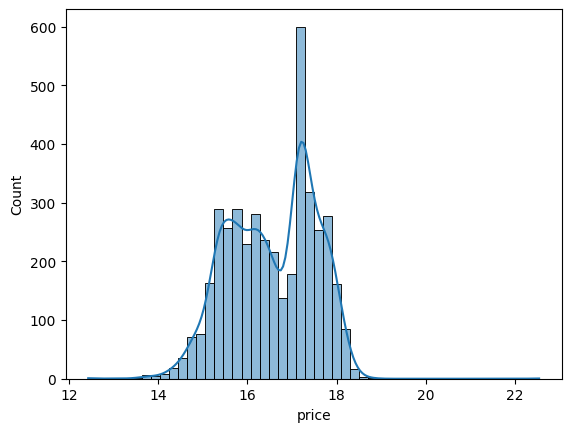

In [466]:
sns.histplot(np.log1p(df['price']), bins=50, kde= True)

<Axes: xlabel='price'>

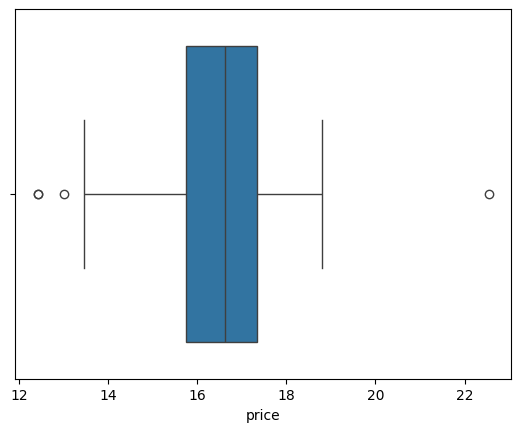

In [450]:
sns.boxplot(x=np.log1p(df_cleaned['price']))

In [476]:
np.log1p(df['area_sqft']).skew()

np.float64(-0.4849358952437718)

<Axes: xlabel='area_sqft', ylabel='Count'>

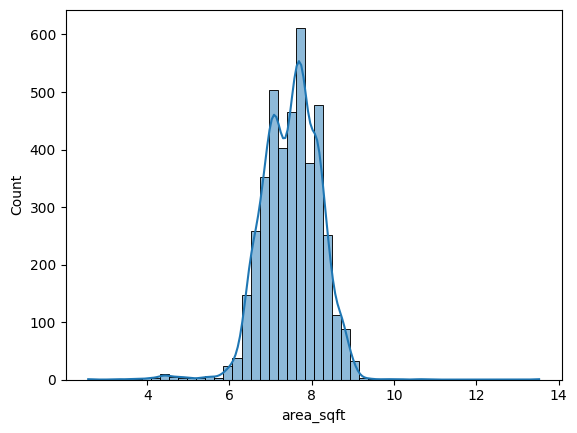

In [467]:
sns.histplot(np.log1p(df['area_sqft']), bins=50, kde=True)

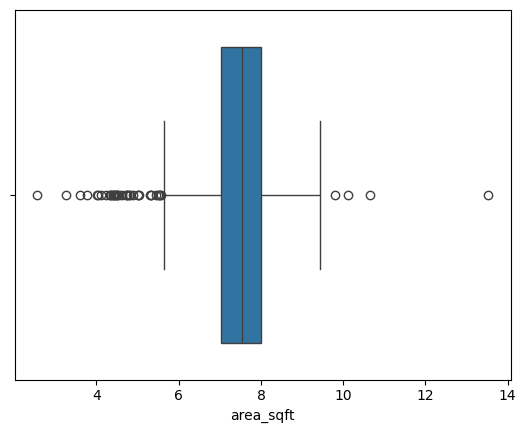

In [457]:
sns.boxplot(x=np.log1p(df_cleaned['area_sqft']))
plt.show()

In [477]:
df['BHK'].skew()

np.float64(-0.2257375756637243)

<Axes: xlabel='BHK', ylabel='Count'>

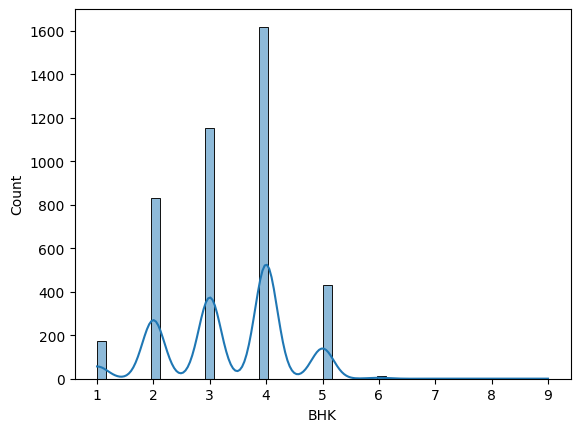

In [470]:
sns.histplot(df['BHK'], bins=50, kde= True)

<Axes: xlabel='BHK'>

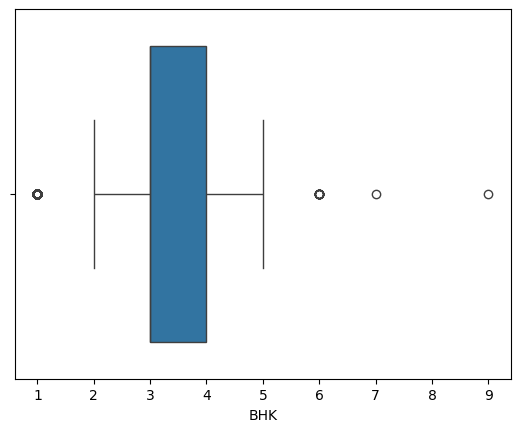

In [471]:
sns.boxplot(x=(df_cleaned['BHK']))

In [445]:
categorical_col = df.select_dtypes(include=['object', 'category']).columns
print(categorical_col)

Index(['type_area', 'transaction', 'furnishing', 'status_type', 'Building',
       'locality'],
      dtype='object')


In [446]:
print(f"removed : {len(df)} and df_cleaned: {len(df_cleaned)}")

removed : 4220 and df_cleaned: 4187


# data export to the csv file for training on another notebook
